In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [3]:
pred_cefta = np.load("results/cv/cv_pred__Ceftazidim.npy")
pred_cipro = np.load("results/cv/cv_pred__Ciprofloxacin.npy")
pred_colis = np.load("results/cv/cv_pred__Colistin.npy")
pred_merop = np.load("results/cv/cv_pred__Meropenem.npy")
pred_tobra = np.load("results/cv/cv_pred__Tobramycin.npy")

In [4]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]

In [5]:
true_cefta = pheno.iloc[:, 2].dropna().to_numpy()
true_cipro = pheno.iloc[:, 3].dropna().to_numpy()
true_colis = pheno.iloc[:, 5].dropna().to_numpy()
true_merop = pheno.iloc[:, 4].dropna().to_numpy()
true_tobra = pheno.iloc[:, 1].dropna().to_numpy()

In [7]:
balanced_accuracy_score(true_cefta, (pred_cefta >= .5).astype(int))

0.8110991572530034

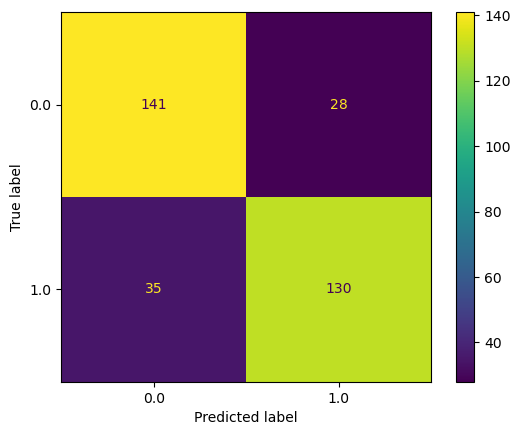

In [8]:
ConfusionMatrixDisplay.from_predictions(true_cefta, (pred_cefta >= .5).astype(int))

In [9]:
balanced_accuracy_score(true_cipro, (pred_cipro >= .5).astype(int))

0.8836952055876869

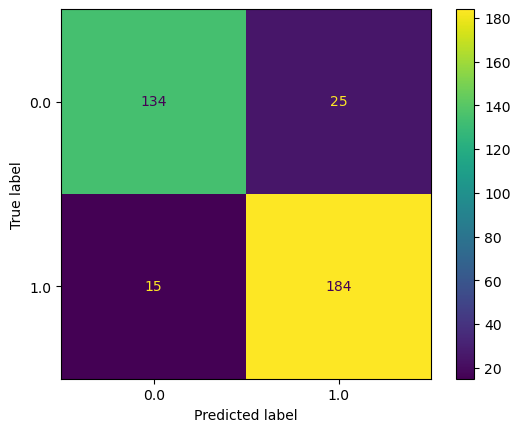

In [10]:
ConfusionMatrixDisplay.from_predictions(true_cipro, (pred_cipro >= .5).astype(int))

In [11]:
balanced_accuracy_score(true_colis, pred_colis)

0.7534239227605937

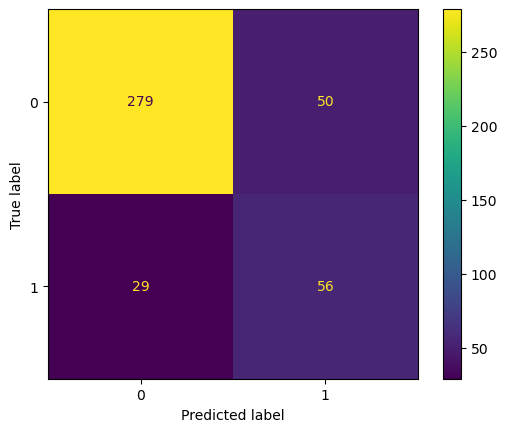

In [12]:
ConfusionMatrixDisplay.from_predictions(true_colis, pred_colis)
plt.savefig("rapport/images/conf_mat_colis.png", dpi=300, bbox_inches="tight")

In [13]:
balanced_accuracy_score(true_merop, (pred_merop >= .5).astype(int))

0.9140089418777944

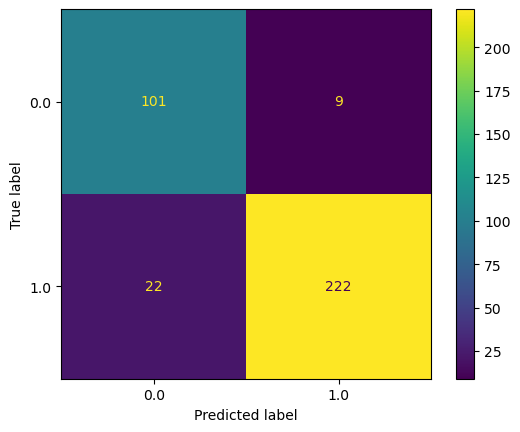

In [14]:
ConfusionMatrixDisplay.from_predictions(true_merop, (pred_merop >= .5).astype(int))
plt.savefig("rapport/images/conf_mat_merop.png", dpi=300, bbox_inches="tight")

In [16]:
balanced_accuracy_score(true_tobra, (pred_tobra >= .5).astype(int))

0.9314381270903009

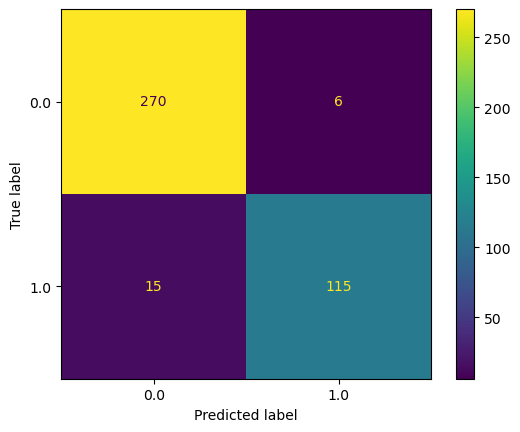

In [17]:
ConfusionMatrixDisplay.from_predictions(true_tobra, (pred_tobra >= .5).astype(int))

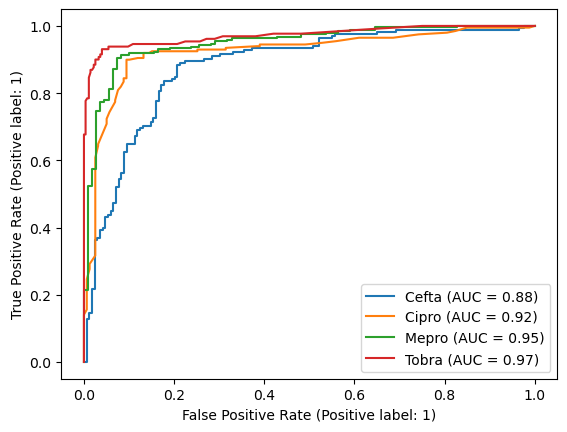

In [19]:
ax = RocCurveDisplay.from_predictions(true_cefta, pred_cefta, name="Cefta").ax_
ax = RocCurveDisplay.from_predictions(true_cipro, pred_cipro, ax=ax, name="Cipro").ax_
ax = RocCurveDisplay.from_predictions(true_merop, pred_merop, ax=ax, name="Mepro").ax_
RocCurveDisplay.from_predictions(true_tobra, pred_tobra, ax=ax, name="Tobra")